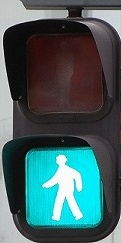

In [1]:
from IPython.display import Image
Image(filename='../darknet/only_traffic_light2.jpg') 

In [46]:
import cv2
import numpy as np

img = cv2.imread("../darknet/only_traffic_light.jpg") # 画像を読み込む。

# 色基準で2値化する。
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 色の範囲を指定する
lower_red1 = np.array([165,10,10])
upper_red1 = np.array([180,255,255])

lower_red2 = np.array([0,10,10])
upper_red2 = np.array([15,255,255])

# 指定した色に基づいたマスク画像の生成
red_mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
red_mask = red_mask1 + red_mask2

# output = cv2.bitwise_and(hsv, hsv, mask = mask)
target = cv2.bitwise_and(img,img, mask=red_mask)

In [7]:
import cv2
import numpy as np

img2 = cv2.imread("../darknet/only_traffic_light2.jpg") # 画像を読み込む。

# 色基準で2値化する。
hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

# 色の範囲を指定する
lower_green = np.array([35, 10, 10])
upper_green = np.array([95, 255, 255])

# 指定した色に基づいたマスク画像の生成
green_mask = cv2.inRange(hsv, lower_green, upper_green)

output = cv2.bitwise_and(hsv, hsv, mask = green_mask)
target = cv2.bitwise_and(img2,img2, mask=green_mask)

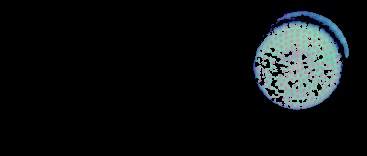

In [32]:
# 結果のファイルを作成
cv2.imwrite("../darknet/redLight_img.jpg", output)
Image(filename='../darknet/redLight_img.jpg') 

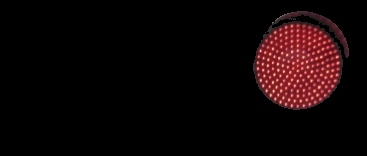

In [38]:
cv2.imwrite("../darknet/redLight_img2.jpg", target)
Image(filename='../darknet/redLight_img2.jpg') 

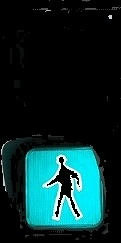

In [8]:
# 結果のファイルを作成
cv2.imwrite("../darknet/greenLight_img.jpg", output)
Image(filename='../darknet/greenLight_img.jpg') 
cv2.imwrite("../darknet/greenLight_img2.jpg", target)
Image(filename='../darknet/greenLight_img2.jpg') 

In [9]:
if green_mask.any():
    print("The color is blue.")
elif red_mask.any():
    print("The color is red.")
else:
    print("The color is none.")

The color is blue.


In [ ]:
m = cv2.countNonZero(green_mask)
h, w = green_mask.shape
per = round(100*float(m)/(w * h),1)
print("Moment[px]:",m)
print("Percent of green[%]:", per)
cv2.imshow("Mask of red",green_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
m = cv2.countNonZero(red_mask)
h, w = green_mask.shape
per = round(100*float(m)/(w * h),1)
print("Moment[px]:",m)
print("Percent of red[%]:", per)
cv2.imshow("Mask of red",red_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()